In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
y = pd.read_csv('/content/drive/MyDrive/מיני פרוייקט לוקמיה/דאטא/y_data.csv', delimiter='\t')

train = pd.read_csv('/content/drive/MyDrive/מיני פרוייקט לוקמיה/דאטא/דאטא 1 מתוקן.xlsx - data_set_ALL_AML_train.csv')

test = pd.read_csv('/content/drive/MyDrive/מיני פרוייקט לוקמיה/דאטא/דאטא 2 מתוקן - data_set_ALL_AML_independent.csv')

מפרידה את העמודות לשני עמודות עם כותרות שיקל בזיהוי

In [4]:
# הצגת הנתונים לפני הפיצול
print("Data before splitting:")
print(y.head())

Data before splitting:
  patient,cancer
0          1,ALL
1          2,ALL
2          3,ALL
3          4,ALL
4          5,ALL


In [5]:
import pandas as pd

# פיצול עמודת 'patient,cancer' לשתי עמודות נפרדות
if 'patient,cancer' in y.columns:
    y[['patient', 'cancer']] = y['patient,cancer'].str.split(',', expand=True)
    y = y.drop('patient,cancer', axis=1)

# הצגת הנתונים לאחר הפיצול
print("\nData after splitting:")
print(y.head())

# הצגת שמות העמודות של y
print("\nColumns of y:")
print(y.columns)




Data after splitting:
  patient cancer
0       1    ALL
1       2    ALL
2       3    ALL
3       4    ALL
4       5    ALL

Columns of y:
Index(['patient', 'cancer'], dtype='object')


מדפיסה לראות את הכותרות של העמודות בכל קובץ

In [6]:
print("y columns:", y.columns)
print("train columns:", train.columns)
print("test columns:", test.columns)

y columns: Index(['patient', 'cancer'], dtype='object')
train columns: Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '34', '35',
       '36', '37', '38', '28', '29', '30', '31', '32', '33'],
      dtype='object')
test columns: Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')


מדפיסה את ההתחלה של כל קובץ כדי להבין יותר את הדאטא

In [ ]:
print(train.head())
print(test.head())

                      Gene Description Gene Accession Number    1    2    3  \
0  AFFX-BioB-5_at (endogenous control)        AFFX-BioB-5_at -214 -139  -76   
1  AFFX-BioB-M_at (endogenous control)        AFFX-BioB-M_at -153  -73  -49   
2  AFFX-BioB-3_at (endogenous control)        AFFX-BioB-3_at  -58   -1 -307   
3  AFFX-BioC-5_at (endogenous control)        AFFX-BioC-5_at   88  283  309   
4  AFFX-BioC-3_at (endogenous control)        AFFX-BioC-3_at -295 -264 -376   

     4    5    6    7    8  ...   35   36   37   38   28   29   30   31   32  \
0 -135 -106 -138  -72 -413  ...    7 -213  -25  -72   -4   15 -318  -32 -124   
1 -114 -125  -85 -144 -260  ... -100 -252  -20 -139 -116 -114 -192  -49  -79   
2  265  -76  215  238    7  ...  -57  136  124   -1 -125    2  -95   49  -37   
3   12  168   71   55   -2  ...  132  318  325  392  241  193  312  230  330   
4 -419 -230 -272 -399 -541  ... -377 -209 -396 -324 -191  -51 -139 -367 -188   

    33  
0 -135  
1 -186  
2  -70  
3  337  

In [ ]:
print("train Information:")
print(train.info())

print("\ntest Statistics:")
print(test.describe())



train Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   1                      7129 non-null   int64 
 3   2                      7129 non-null   int64 
 4   3                      7129 non-null   int64 
 5   4                      7129 non-null   int64 
 6   5                      7129 non-null   int64 
 7   6                      7129 non-null   int64 
 8   7                      7129 non-null   int64 
 9   8                      7129 non-null   int64 
 10  9                      7129 non-null   int64 
 11  10                     7129 non-null   int64 
 12  11                     7129 non-null   int64 
 13  12                     7129 non-null   int64 
 14  13                     7129 non-null   int64 
 15  14

Exploratory Data Analysis (EDA):

נבדוק כמה חולי AML וכמה חולי ALL יש לנו בדאטא

In [ ]:
print(y.columns)


Index(['patient', 'cancer'], dtype='object')


In [ ]:
print(y['cancer'].value_counts())


cancer
ALL    47
AML    25
Name: count, dtype: int64


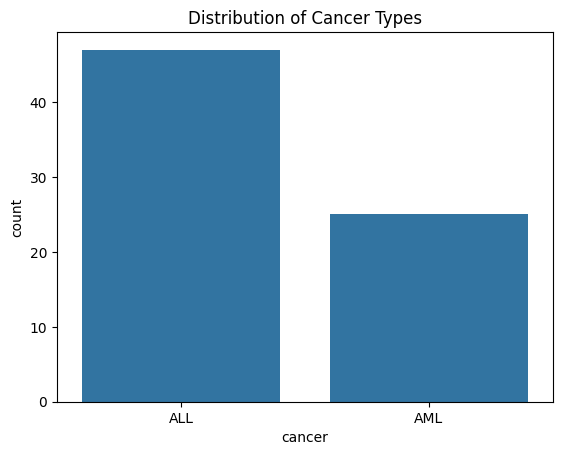

In [7]:
# EDA for Cancer Mapping
sns.countplot(data=y, x='cancer')
plt.title('Distribution of Cancer Types')
plt.show()


נעביר את הערכים לערכים נומרים בy

In [8]:
# Recode label to numeric
y = y.replace({'ALL':0,'AML':1})
labels = ['ALL', 'AML']

עכשיו נעבור לנתונים של החולים

In [ ]:
print(train.shape)
print(test.shape)

(7129, 40)
(7129, 36)


In [ ]:
train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [ ]:
test.head()

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


השמות של העמודות לא בסדר מספרי, נסדר אותם

In [9]:
train_columns_titles = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

train =train.reindex(columns=train_columns_titles)

In [ ]:
train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,15,-318,-32,-124,-135,-20,7,-213,-25,-72
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,2,-95,49,-37,-70,-50,-57,136,124,-1
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,193,312,230,330,337,101,132,318,325,392
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324


In [10]:
test_columns_titles = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

test = test.reindex(columns=test_columns_titles)

In [ ]:
test.head()

,Gene Description,Gene Accession Number,39,40,41,42,43,44,45,46,...,63,64,65,66,67,68,69,70,71,72
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,-62,22,86,-146,-187,-56,...,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-23,-153,-36,-74,-187,-43,...,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,-7,17,-141,170,312,43,...,-46,-124,-5,63,-153,49,-30,12,23,-50
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,142,276,252,174,142,177,...,146,431,141,95,237,180,68,129,146,211
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-233,-211,-201,-32,114,-116,...,-172,-496,-256,-191,-215,-257,-110,-108,-171,-206


נחליף בין השורות לעמודות, כדי שהתכונות יהיו בעמודות וזה יקל עלינו לבצע הורדת מימדים ואימון המודל

In [11]:
X_train = train.T
X_test = test.T

print(X_train.shape)
X_train.head()

(40, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


נהפוך את השורה השנייה לשמות העמודות ונמחק את הראשונה, אני רואה ששתי השורות פשוט כפיליות אחת של השנייה

In [12]:
# Clean up the column names for training data
X_train.columns = X_train.iloc[1]
# Set column names of X_train to the values in the second row of X_train.

X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
# Drop columns 'Gene Description' and 'Gene Accession Number' from X_train and convert the remaining columns to numeric.

# Clean up the column names for Testing data
X_test.columns = X_test.iloc[1]
# Set column names of X_test to the values in the second row of X_test.

X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
# Drop columns 'Gene Description' and 'Gene Accession Number' from X_test and convert the remaining columns to numeric.

print(X_train.shape)
print(X_test.shape)
X_train.head()
# Print the shape of X_train and X_test and display the first few rows of X_train.


(38, 7129)
(34, 7129)


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


עכשיו נתאים את התוויות של המטפולים לנתונים

In [ ]:
print(y)

   patient  cancer
0        1       0
1        2       0
2        3       0
3        4       0
4        5       0
..     ...     ...
67      68       0
68      69       0
69      70       0
70      71       0
71      72       0

[72 rows x 2 columns]


 חלוקת הנתונים לסט אימון וסט בדיקה ואיפוס האינדקסים

In [13]:
"""
Split into train and test (we first need to reset the index as the indexes of two dataframes need to be the same before you combine them).
"""
# Convert 'patient' column to integers
y["patient"] = y["patient"].astype(int)

# Reset index for X_train and y_train
X_train = X_train.reset_index(drop=True)
# Reset the index of X_train dataframe and drop the previous index.

# חלוקה נכונה של הנתונים וה-labels
y_train = y[y.patient <= 38]['cancer'].reset_index(drop=True)


# Subset the labels (y) for the first 38 patients and reset index, dropping the previous index.

# Reset index for X_test and y_test
X_test = X_test.reset_index(drop=True)
# Reset the index of X_test dataframe and drop the previous index.

y_test = y[y.patient > 38]['cancer'].reset_index(drop=True)
# Subset the labels (y) for the patients after the first 38 and reset index, dropping the previous index.


נבדוק איך התקדמנו

In [ ]:
X_train.describe()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-120.868421,-150.526316,-17.157895,181.394737,-276.552632,-439.210526,-43.578947,-201.184211,99.052632,112.131579,...,178.763158,750.842105,8.815789,399.131579,-20.052632,869.052632,335.842105,19.210526,504.394737,-29.210526
std,109.555656,75.734507,117.686144,117.468004,111.004431,135.458412,219.482393,90.838989,83.178397,211.815597,...,84.826830,298.008392,77.108507,469.579868,42.346031,482.366461,209.826766,31.158841,728.744405,30.851132
min,-476.000000,-327.000000,-307.000000,-36.000000,-541.000000,-790.000000,-479.000000,-463.000000,-82.000000,-215.000000,...,30.000000,224.000000,-178.000000,36.000000,-112.000000,195.000000,41.000000,-50.000000,-2.000000,-94.000000
25%,-138.750000,-205.000000,-83.250000,81.250000,-374.250000,-547.000000,-169.000000,-239.250000,36.000000,-47.000000,...,120.000000,575.500000,-42.750000,174.500000,-48.000000,595.250000,232.750000,8.000000,136.000000,-42.750000
50%,-106.500000,-141.500000,-43.500000,200.000000,-263.000000,-426.500000,-33.500000,-185.500000,99.500000,70.500000,...,174.500000,700.000000,10.500000,266.000000,-18.000000,744.500000,308.500000,20.000000,243.500000,-26.000000
75%,-68.250000,-94.750000,47.250000,279.250000,-188.750000,-344.750000,79.000000,-144.750000,152.250000,242.750000,...,231.750000,969.500000,57.000000,451.750000,9.250000,1112.000000,389.500000,30.250000,487.250000,-11.500000
max,17.000000,-20.000000,265.000000,392.000000,-51.000000,-155.000000,419.000000,-24.000000,283.000000,561.000000,...,356.000000,1653.000000,218.000000,2527.000000,52.000000,2315.000000,1109.000000,115.000000,3193.000000,36.000000


אוטואינקודר

In [14]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:

# הצגת שמות העמודות של y
print("\nColumns of y:")
print(y.columns)


Columns of y:
Index(['patient', 'cancer'], dtype='object')


In [16]:
# הצגת תדירות הערכים בעמודת 'cancer'
print("\nValue counts of 'cancer':")
print(y['cancer'].value_counts())


Value counts of 'cancer':
cancer
0    47
1    25
Name: count, dtype: int64


In [17]:
# ניקוי שמות העמודות לנתוני אימון ובדיקה
X_train = train.T
X_test = test.T

In [ ]:
# הצגת צורת הנתונים לפני הניקוי
print("X_train shape before cleanup:", X_train.shape)
print("X_test shape before cleanup:", X_test.shape)

X_train shape before cleanup: (40, 7129)
X_test shape before cleanup: (36, 7129)


In [18]:
# ניקוי שמות העמודות
X_train.columns = X_train.iloc[1]
X_test.columns = X_test.iloc[1]
X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

In [ ]:
# הצגת צורת הנתונים לאחר הניקוי
print("X_train shape after cleanup:", X_train.shape)
print("X_test shape after cleanup:", X_test.shape)

X_train shape after cleanup: (38, 7129)
X_test shape after cleanup: (34, 7129)


In [19]:
# חלוקה נכונה של הנתונים וה-labels
y["patient"] = y["patient"].astype(int)
X_train = X_train.reset_index(drop=True)
y_train = y[y.patient <= 38]['cancer'].reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y[y.patient > 38]['cancer'].reset_index(drop=True)

In [20]:
# המרה למספרים (קטגוריות ל-labels)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [21]:
# שלב 2: סטנדרטיזציה של הנתונים
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

אוטואינקודר

In [72]:
# שלב 3: בניית האוטואינקודר
input_dim = X_train_scaled.shape[1]
encoding_dim = 64

אינקודר

In [74]:
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.layers import Dropout
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=l2(0.01))(encoded)
encoded = Dropout(0.5)(encoded)

דיקודר

In [75]:
# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [81]:
# Model
autoencoder = Model(input_layer, decoded)

# שלב 4: קומפילציה ואימון המודל
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 0.7255 - val_loss: 1.1450
Epoch 2/50
1/1 [==============================] - 0s 203ms/step - loss: 0.7298 - val_loss: 1.1451
Epoch 3/50
1/1 [==============================] - 0s 229ms/step - loss: 0.7231 - val_loss: 1.1445
Epoch 4/50
1/1 [==============================] - 0s 161ms/step - loss: 0.7328 - val_loss: 1.1440
Epoch 5/50
1/1 [==============================] - 0s 150ms/step - loss: 0.7289 - val_loss: 1.1433
Epoch 6/50
1/1 [==============================] - 0s 178ms/step - loss: 0.7293 - val_loss: 1.1424
Epoch 7/50
1/1 [==============================] - 0s 139ms/step - loss: 0.7366 - val_loss: 1.1414
Epoch 8/50
1/1 [==============================] - 0s 101ms/step - loss: 0.7526 - val_loss: 1.1407
Epoch 9/50
1/1 [==============================] - 0s 114ms/step - loss: 0.7217 - val_loss: 1.1402
Epoch 10/50
1/1 [==============================] - 0s 128ms/step - loss: 0.7256 - val_loss: 1.1401
Epoch 11/50
1/1 [=====

In [82]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# אימון מסווג XGBoost על הייצוגים הדחוסים
classifier = xgb.XGBClassifier()
classifier.fit(X_train_encoded, y_train)

# חיזוי ובדיקת ביצועים על סט הבדיקה
y_pred_test = classifier.predict(X_test_encoded)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy with XGBoost: {accuracy_test * 100:.2f}%")


Test Accuracy with XGBoost: 73.53%


Final Accuracy: 73.53%


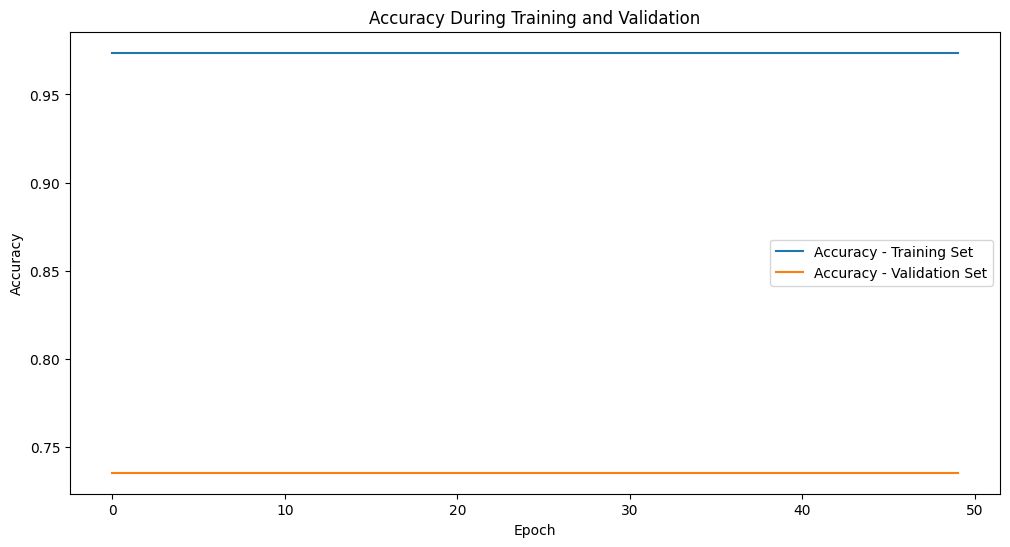

In [83]:
# יצירת גרף דיוק למסווג
train_accuracies = []
val_accuracies = []

for _ in range(50):
    classifier.fit(X_train_encoded, y_train)
    y_train_pred = classifier.predict(X_train_encoded)
    y_val_pred = classifier.predict(X_test_encoded)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_val_pred)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

print(f"Final Accuracy: {val_accuracies[-1] * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Accuracy - Training Set')
plt.plot(val_accuracies, label='Accuracy - Validation Set')
plt.title('Accuracy During Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



נבדוק את המודל על הtest

In [84]:
# חיזוי ובדיקת ביצועים על סט הבדיקה
y_pred_test = classifier.predict(X_test_encoded)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# חיזוי ובדיקת ביצועים על סט הוולידציה (כבר נעשה בקוד הקודם)
y_pred_val = classifier.predict(X_test_encoded)
accuracy_val = accuracy_score(y_test, y_pred_val)
print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")


Test Accuracy: 73.53%
Validation Accuracy: 73.53%


Epoch 1/50
1/1 [==============================] - 1s 753ms/step - loss: 1.8679 - val_loss: 1.9030
Epoch 2/50
1/1 [==============================] - 0s 45ms/step - loss: 1.8015 - val_loss: 1.8419
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: 1.7396 - val_loss: 1.7858
Epoch 4/50
1/1 [==============================] - 0s 49ms/step - loss: 1.6800 - val_loss: 1.7349
Epoch 5/50
1/1 [==============================] - 0s 44ms/step - loss: 1.6249 - val_loss: 1.6890
Epoch 6/50
1/1 [==============================] - 0s 46ms/step - loss: 1.5712 - val_loss: 1.6480
Epoch 7/50
1/1 [==============================] - 0s 49ms/step - loss: 1.5187 - val_loss: 1.6115
Epoch 8/50
1/1 [==============================] - 0s 49ms/step - loss: 1.4725 - val_loss: 1.5788
Epoch 9/50
1/1 [==============================] - 0s 56ms/step - loss: 1.4103 - val_loss: 1.5502
Epoch 10/50
1/1 [==============================] - 0s 55ms/step - loss: 1.3722 - val_loss: 1.5248
Epoch 11/50
1/1 [===========

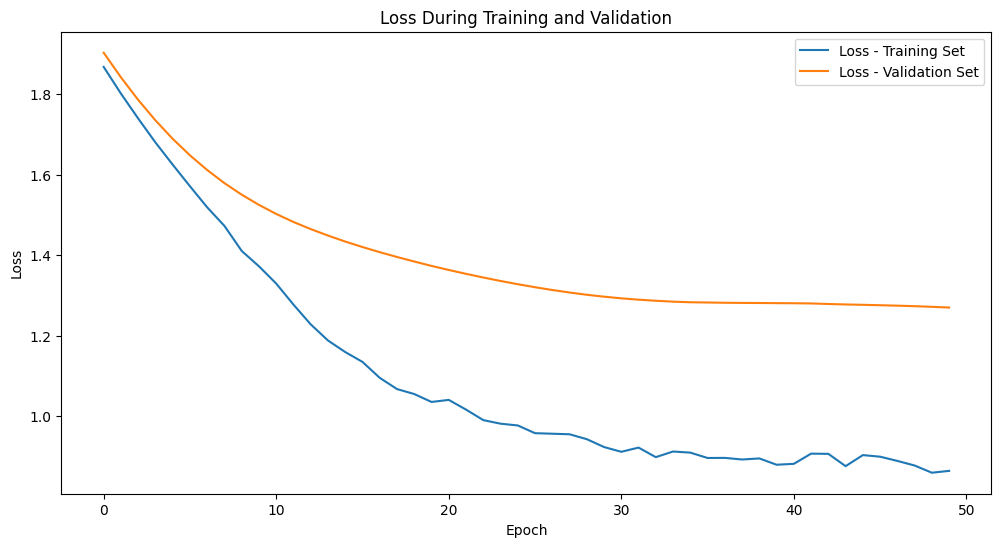

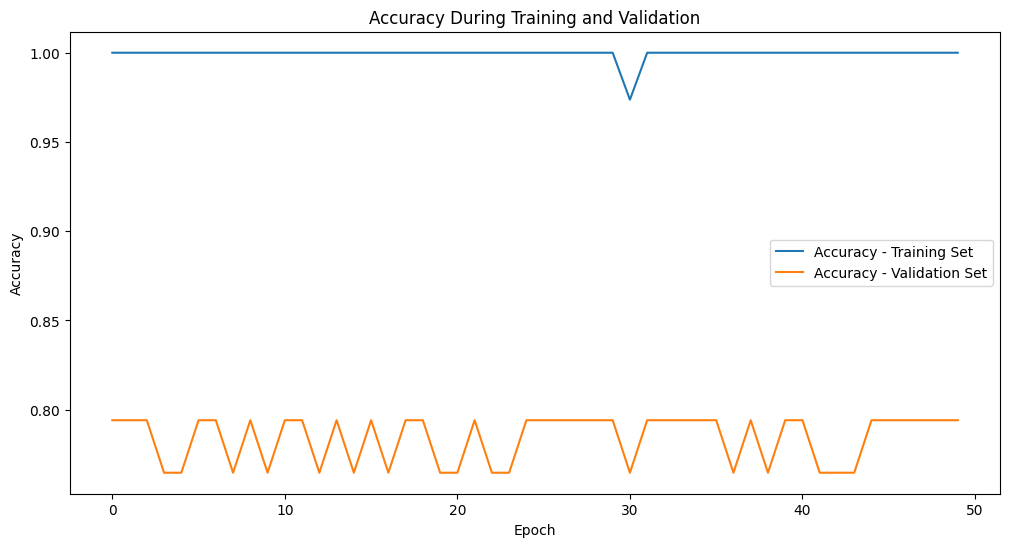

In [85]:
from keras.layers import Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# שלב 3: בניית האוטואינקודר עם רגולריזציה
input_dim = X_train_scaled.shape[1]
encoding_dim = 32

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
encoded = Dropout(0.5)(encoded)  # הוספת Dropout

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Model
autoencoder = Model(input_layer, decoded)

# שלב 4: קומפילציה ואימון המודל
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2)

# שלב 5: הפקת הייצוגים הדחוסים
encoder = Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# שלב 6: אימון מסווג על הייצוגים הדחוסים
classifier = RandomForestClassifier()
classifier.fit(X_train_encoded, y_train)

# חיזוי וביצועים
y_pred_train = classifier.predict(X_train_encoded)
y_pred_test = classifier.predict(X_test_encoded)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# יצירת גרפי האובדן
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss - Training Set')
plt.plot(history.history['val_loss'], label='Loss - Validation Set')
plt.title('Loss During Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# גרף דיוק למסווג
train_accuracies = []
val_accuracies = []

for _ in range(50):
    classifier.fit(X_train_encoded, y_train)
    y_train_pred = classifier.predict(X_train_encoded)
    y_val_pred = classifier.predict(X_test_encoded)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_val_pred)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Accuracy - Training Set')
plt.plot(val_accuracies, label='Accuracy - Validation Set')
plt.title('Accuracy During Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 1.8667 - val_loss: 1.9032
Epoch 2/50
1/1 [==============================] - 0s 130ms/step - loss: 1.7996 - val_loss: 1.8451
Epoch 3/50
1/1 [==============================] - 0s 170ms/step - loss: 1.7368 - val_loss: 1.7916
Epoch 4/50
1/1 [==============================] - 0s 207ms/step - loss: 1.6774 - val_loss: 1.7420
Epoch 5/50
1/1 [==============================] - 0s 204ms/step - loss: 1.6262 - val_loss: 1.6962
Epoch 6/50
1/1 [==============================] - 0s 244ms/step - loss: 1.5699 - val_loss: 1.6540
Epoch 7/50
1/1 [==============================] - 0s 221ms/step - loss: 1.5261 - val_loss: 1.6155
Epoch 8/50
1/1 [==============================] - 0s 237ms/step - loss: 1.4773 - val_loss: 1.5801
Epoch 9/50
1/1 [==============================] - 0s 176ms/step - loss: 1.4392 - val_loss: 1.5480
Epoch 10/50
1/1 [==============================] - 0s 212ms/step - loss: 1.3986 - val_loss: 1.5190
Epoch 11/50
1/1 [=====

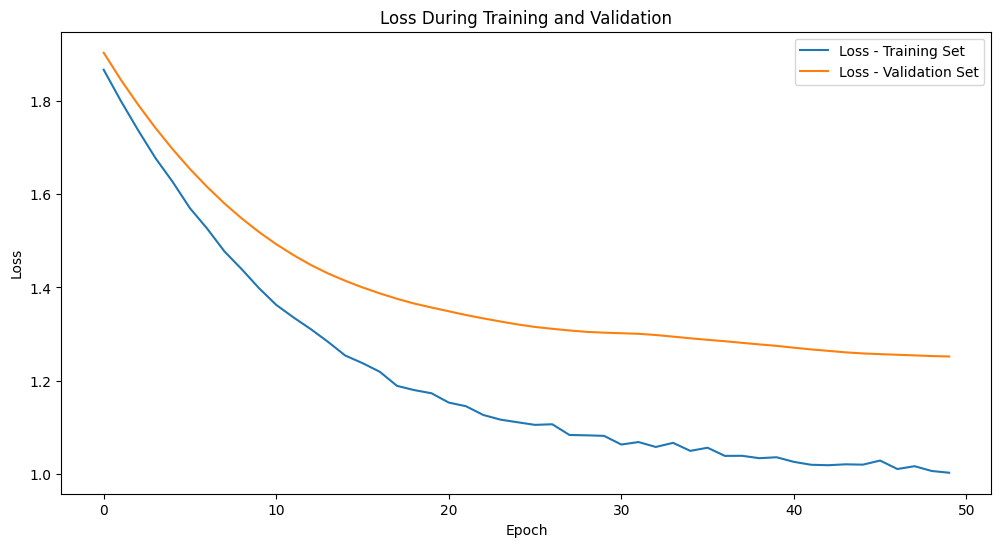

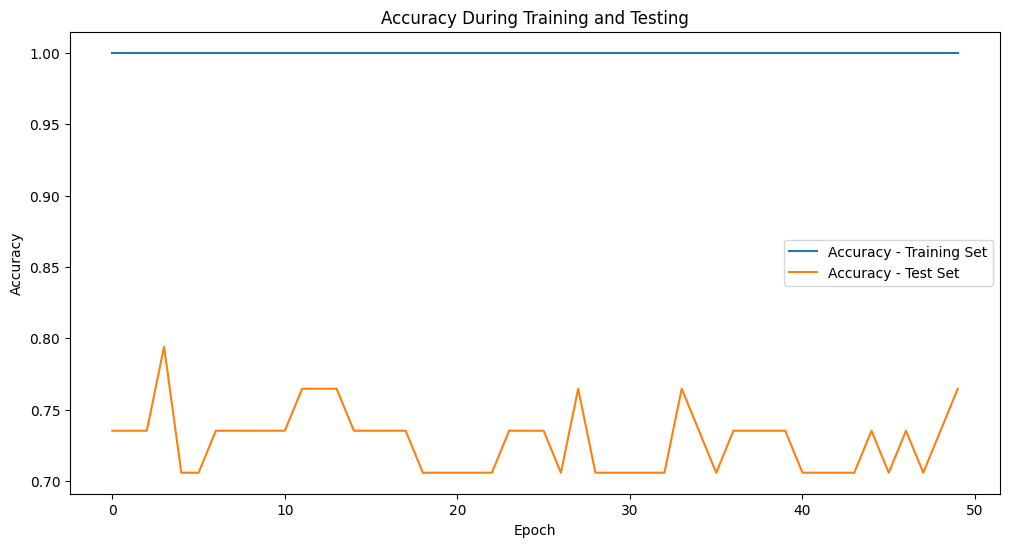

In [90]:
from keras.layers import Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# שלב 3: בניית האוטואינקודר עם רגולריזציה
input_dim = X_train_scaled.shape[1]
encoding_dim = 32

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
encoded = Dropout(0.5)(encoded)  # הוספת Dropout

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Model
autoencoder = Model(input_layer, decoded)

# שלב 4: קומפילציה ואימון המודל
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2)

# שלב 5: הפקת הייצוגים הדחוסים
encoder = Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# שלב 6: אימון מסווג על הייצוגים הדחוסים
classifier = RandomForestClassifier()
classifier.fit(X_train_encoded, y_train)

# חיזוי ובדיקת ביצועים על סט הבדיקה
y_pred_test = classifier.predict(X_test_encoded)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# חיזוי ובדיקת ביצועים על סט הוולידציה
y_pred_val = classifier.predict(X_test_encoded)
accuracy_val = accuracy_score(y_test, y_pred_val)
print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")

# יצירת גרפי האובדן
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss - Training Set')
plt.plot(history.history['val_loss'], label='Loss - Validation Set')
plt.title('Loss During Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# גרף דיוק למסווג
train_accuracies = []
test_accuracies = []

for _ in range(50):
    classifier.fit(X_train_encoded, y_train)
    y_train_pred = classifier.predict(X_train_encoded)
    y_test_pred = classifier.predict(X_test_encoded)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Accuracy - Training Set')
plt.plot(test_accuracies, label='Accuracy - Test Set')
plt.title('Accuracy During Training and Testing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train_encoded, y_train)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test_encoded)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Best Test Accuracy with Grid Search: {accuracy_test * 100:.2f}%")


Best Test Accuracy with Grid Search: 76.47%


MODELS

וד להקמת מודל Gradient Boosting עם כיוונון היפר-פרמטרים והערכת ביצועים:

In [86]:
print(f"Number of samples in X_train_encoded: {X_train_encoded.shape[0]}")
print(f"Number of samples in y_train: {y_train.shape[0]}")


Number of samples in X_train_encoded: 38
Number of samples in y_train: 38


In [87]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# בניית המודל לאחר הסרת החריגים
# בדיקת מספר הדוגמאות כדי לוודא שהתאמתם נכונה
print(f"Number of samples in X_train_clean_final: {X_train_encoded.shape[0]}")
print(f"Number of samples in y_train_clean_final: {y_train.shape[0]}")
print(f"Number of samples in X_test_clean_final: {X_test_encoded.shape[0]}")
print(f"Number of samples in y_test_clean_final: {y_test.shape[0]}")

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],   # מספר העצים ביער
    'learning_rate': [0.01, 0.1, 0.2],  # קצב הלמידה
    'max_depth': [3, 4, 5]  # עומק מרבי של כל עץ
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search.fit(X_train_encoded, y_train)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores = cross_val_score(best_model, X_train_encoded, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model.fit(X_train_encoded, y_train)

# ניבוי על נתוני הבדיקה
y_pred = best_model.predict(X_test_encoded)

# הערכת ביצועים
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Number of samples in X_train_clean_final: 38
Number of samples in y_train_clean_final: 38
Number of samples in X_test_clean_final: 34
Number of samples in y_test_clean_final: 34


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Cross-Validation Scores: [0.875      0.875      0.75       0.85714286 1.        ]
Mean CV Accuracy: 0.8714285714285716
Test Accuracy: 0.7647058823529411
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       1.00      0.43      0.60        14

    accuracy                           0.76        34
   macro avg       0.86      0.71      0.72        34
weighted avg       0.83      0.76      0.74        34



Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
rfc = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 150],   # מספר העצים ביער
    'max_depth': [3, 4, 5, None],     # עומק מרבי של כל עץ
    'min_samples_split': [2, 5, 10],  # מינימום דוגמאות לפיצול צומת
    'min_samples_leaf': [1, 2, 4]     # מינימום דוגמאות לעלה
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search_rf.fit(X_train_encoded, y_train)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print(f"Best parameters found for Random Forest: {best_params_rf}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores_rf = cross_val_score(best_model_rf, X_train_encoded, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for Random Forest: {cv_scores_rf}")
print(f"Mean CV Accuracy for Random Forest: {np.mean(cv_scores_rf)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model_rf.fit(X_train_encoded, y_train)

# ניבוי על נתוני הבדיקה
y_pred_rf = best_model_rf.predict(X_test_encoded)

# הערכת ביצועים
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Test Accuracy for Random Forest: {accuracy_rf}")
print(f"Classification Report for Random Forest:\n{report_rf}")


Best parameters found for Random Forest: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-Validation Scores for Random Forest: [0.875 1.    0.75  1.    1.   ]
Mean CV Accuracy for Random Forest: 0.925
Test Accuracy for Random Forest: 0.7941176470588235
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.89      0.57      0.70        14

    accuracy                           0.79        34
   macro avg       0.82      0.76      0.77        34
weighted avg       0.81      0.79      0.78        34



In [89]:

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# יישום SMOTE לאיזון הנתונים
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
rfc = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 150],   # מספר העצים ביער
    'max_depth': [3, 4, 5, None],     # עומק מרבי של כל עץ
    'min_samples_split': [2, 5, 10],  # מינימום דוגמאות לפיצול צומת
    'min_samples_leaf': [1, 2, 4]     # מינימום דוגמאות לעלה
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print(f"Best parameters found for Random Forest with SMOTE: {best_params_rf}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores_rf = cross_val_score(best_model_rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for Random Forest with SMOTE: {cv_scores_rf}")
print(f"Mean CV Accuracy for Random Forest with SMOTE: {np.mean(cv_scores_rf)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model_rf.fit(X_train_balanced, y_train_balanced)

# ניבוי על נתוני הבדיקה
y_pred_rf = best_model_rf.predict(X_test_encoded)

# הערכת ביצועים
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Test Accuracy for Random Forest with SMOTE: {accuracy_rf}")
print(f"Classification Report for Random Forest with SMOTE:\n{report_rf}")


Best parameters found for Random Forest with SMOTE: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-Validation Scores for Random Forest with SMOTE: [0.90909091 1.         1.         0.90909091 1.        ]
Mean CV Accuracy for Random Forest with SMOTE: 0.9636363636363636
Test Accuracy for Random Forest with SMOTE: 0.7352941176470589
Classification Report for Random Forest with SMOTE:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.73      0.57      0.64        14

    accuracy                           0.74        34
   macro avg       0.73      0.71      0.72        34
weighted avg       0.73      0.74      0.73        34



SVM

In [ ]:
from sklearn.svm import SVC

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
svc = SVC()
param_grid_svc = {
    'C': [0.1, 1, 10, 100],      # פרמטר הרגולריזציה
    'gamma': [1, 0.1, 0.01, 0.001],  # פרמטר הגרעין
    'kernel': ['rbf', 'linear']   # סוג הגרעין
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search_svc.fit(X_train_encoded, y_train)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params_svc = grid_search_svc.best_params_
best_model_svc = grid_search_svc.best_estimator_

print(f"Best parameters found for SVM: {best_params_svc}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores_svc = cross_val_score(best_model_svc, X_train_encoded, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for SVM: {cv_scores_svc}")
print(f"Mean CV Accuracy for SVM: {np.mean(cv_scores_svc)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model_svc.fit(X_train_encoded, y_train)

# ניבוי על נתוני הבדיקה
y_pred_svc = best_model_svc.predict(X_test_encoded)

# הערכת ביצועים
accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

print(f"Test Accuracy for SVM: {accuracy_svc}")
print(f"Classification Report for SVM:\n{report_svc}")


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found for SVM: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Cross-Validation Scores for SVM: [0.875 0.875 1.    1.    1.   ]
Mean CV Accuracy for SVM: 0.95
Test Accuracy for SVM: 0.8235294117647058
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.79      0.79      0.79        14

    accuracy                           0.82        34
   macro avg       0.82      0.82      0.82        34
weighted avg       0.82      0.82      0.82        34

